In [1]:
#读取h5 文件
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
import sys
from numba import jit
import seaborn as sns

In [2]:
f = h5py.File(r"aCA3_shock_activated_.h5")
# time_points,cell_id
preA = np.array(f["preA"]) # 165,100
preA_cor = np.corrcoef(preA) # 165,165
preA2 = np.array(f["preA2"])# 165,100
preA2_cor = np.corrcoef(preA2)
preB = np.array(f["preB"]) # 165,100
preB_cor = np.corrcoef(preB)
preB2 = np.array(f["preB2"])# 165,100
preB2_cor = np.corrcoef(preB2)

<ipython-input-2-b187c0c8b838>:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(r"aCA3_shock_activated_.h5")
C:\Users\qiushou\.conda\envs\mylab\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\qiushou\.conda\envs\mylab\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [24]:
def shuffle(arr,times,axis=1):
    shuffle_cor=[]
    for i in range(times):
        np.apply_along_axis(np.random.shuffle,axis,arr) # axis=1, shuffle along rows for each columns，就是每行的和不变
#         print(np.sum(arr,axis=axis)[0],np.sum(arr,axis=axis).shape)
        shuffle_cor.append(np.corrcoef(arr))
        sys.stdout.write("shuffle for %s/%s times "%(i+1,times))
        sys.stdout.write("\r")
    print("\r")
    shuffle_cor = np.array(shuffle_cor)
    
    return shuffle_cor #(shuffle_times, neuron_num,neuron_num)


def correlated_pair_threshold(arr,thresh):
    """
    arr_cor: each row means neuron, each column means fr in timebin
    Fig s2_panel B correlated pair threshold 
    """
    # calculate the Pearson's correlation for each pair of each neuron
    arr_cor = np.corrcoef(arr)
    # Pearson R > thresh
    rows,cols = np.where(arr_cor>thresh)
    correlated_pair = np.array([(row,col,arr_cor[row,col]) for row,col in zip(rows,cols) if row <col])
    paried_neurons = [i[0:2] for i in correlated_pair]
    pearson_r = [i[2] for i in correlated_pair]
    probablity = 1 * np.arange(len(pearson_r)) / (len(pearson_r) - 1)
    r_sorted1 = pearson_r.copy()
    r_sorted1.sort()
   
    
    # p<0.05 from shuffle distribution
    shuffle_cor = shuffle(arr,1000,axis=1)
    rows2,cols2 = np.where(arr_cor > np.quantile(shuffle_cor,0.95,axis=0))
    correlated_pair2 = np.array([(row,col,arr_cor[row,col]) for row,col in zip(rows2,cols2) if row <col])
    paried_neurons2 = [i[0:2] for i in correlated_pair2]
    pearson_r2 = [i[2] for i in correlated_pair2]
    probablity2 = 1 * np.arange(len(pearson_r2)) / (len(pearson_r2) - 1)
    r_sorted2 = pearson_r2.copy()
    r_sorted2.sort()
#     sns.kdeplot(pearson_r[:,2],cumulative=True,color="red")
#     print(pearson_r,pearson_r2)
    #plot
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.plot(r_sorted1,probablity,"r-")
    plt.plot(r_sorted2,probablity2,"g-")

#     sns.kdeplot(pearson_r2[:,2],cumulative=True,color="green")
    plt.title("Correlated Pairs")
    plt.xlabel("Pearson's R")
    plt.ylabel("Fraction of neuronal pairs")
    plt.legend(["Pearson's R>0.3",">0.95 shuffle Dist."])
    
    plt.subplot(122)
#     sns.distplot(np.array(pearson_r)[:,0],color="red")
#     sns.distplot(np.array(pearson_r2)[:,0],color="green")
    
    plt.show()
    
    

shuffle for 1000/1000 times 


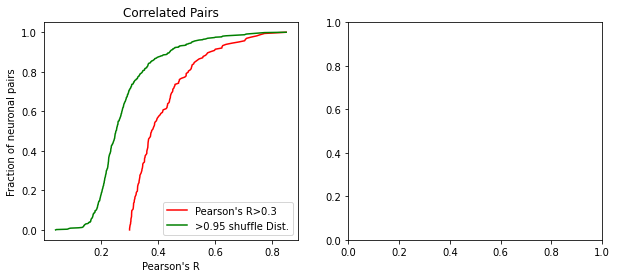

In [25]:
correlated_pair_threshold(preA,0.3)

In [27]:
arr_cor = preA_cor
rows,cols = np.where(arr_cor>0.3)
correlated_pair = [(row,col,arr_cor[row,col]) for row,col in zip(rows,cols) if row <col]
paried_neurons = [i[0:2] for i in correlated_pair]
pearson_r = [i[2] for i in correlated_pair]


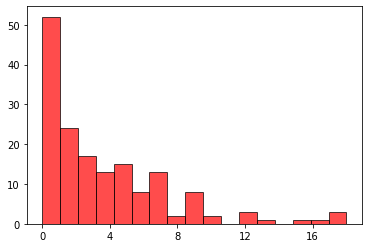

In [78]:
from matplotlib.pyplot import MultipleLocator

plt.hist(np.bincount(neurons),bins=max(np.bincount(neurons))-1,edgecolor="black",facecolor="red",alpha=0.7)
x_major_locator=MultipleLocator(4)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)


In [80]:
np.bincount?

<AxesSubplot:>

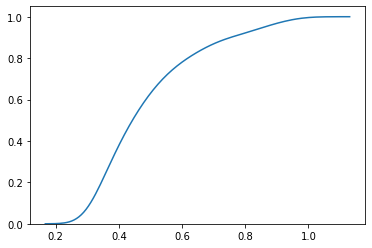

In [10]:
sns.kdeplot(pearson_r[:,2],cumulative=True)

C:\Users\qiushou\.conda\envs\mylab\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\qiushou\.conda\envs\mylab\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


shuffle for 1000/1000 times 


ValueError: `bins` must be positive, when an integer

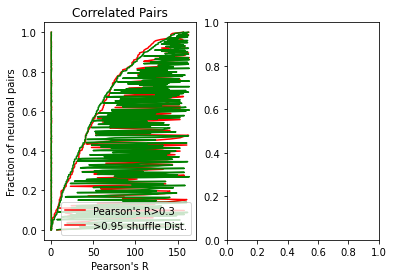

In [704]:
correlated_pair_threshold(preA2,0.3)

C:\Users\qiushou\.conda\envs\mylab\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\qiushou\.conda\envs\mylab\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\qiushou\.conda\envs\mylab\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\qiushou\.conda\envs\mylab\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


shuffle for 1000/1000 times 


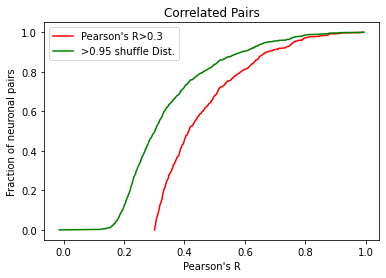

In [670]:
correlated_pair_threshold(preB,0.3)

C:\Users\qiushou\.conda\envs\mylab\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\qiushou\.conda\envs\mylab\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\qiushou\.conda\envs\mylab\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\qiushou\.conda\envs\mylab\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


shuffle for 1000/1000 times 


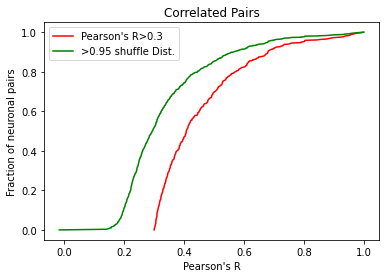

In [671]:
correlated_pair_threshold(preB2,0.3)

In [634]:
1 * np.arange(len(rs)) / (len(rs) - 1)

array([0.        , 0.00159744, 0.00319489, 0.00479233, 0.00638978,
       0.00798722, 0.00958466, 0.01118211, 0.01277955, 0.014377  ,
       0.01597444, 0.01757188, 0.01916933, 0.02076677, 0.02236422,
       0.02396166, 0.02555911, 0.02715655, 0.02875399, 0.03035144,
       0.03194888, 0.03354633, 0.03514377, 0.03674121, 0.03833866,
       0.0399361 , 0.04153355, 0.04313099, 0.04472843, 0.04632588,
       0.04792332, 0.04952077, 0.05111821, 0.05271565, 0.0543131 ,
       0.05591054, 0.05750799, 0.05910543, 0.06070288, 0.06230032,
       0.06389776, 0.06549521, 0.06709265, 0.0686901 , 0.07028754,
       0.07188498, 0.07348243, 0.07507987, 0.07667732, 0.07827476,
       0.0798722 , 0.08146965, 0.08306709, 0.08466454, 0.08626198,
       0.08785942, 0.08945687, 0.09105431, 0.09265176, 0.0942492 ,
       0.09584665, 0.09744409, 0.09904153, 0.10063898, 0.10223642,
       0.10383387, 0.10543131, 0.10702875, 0.1086262 , 0.11022364,
       0.11182109, 0.11341853, 0.11501597, 0.11661342, 0.11821

Text(0, 0.5, 'faction of pairs')

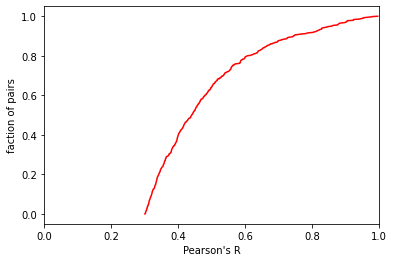

In [632]:
plt.plot(rs,p,"r-")
plt.xlim(0,1)
plt.xlabel("Pearson's R")
plt.ylabel("faction of pairs")

In [588]:
for i, j in zip(rows,cols):
    print(i)

0
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
8
8
8
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
13
13
13
13
13
13
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
16
16
16
16
16
17
17
17
17
17
17
17
17
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
22
22
22
22
23
23
23
23
24
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
29
29
29
29
29
29
29
29
30
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
33
33
33
33
34
34
34
34
34
34
34
34
37
37
37
37
37
37
37
37
38
38
38
38
38
38
38
38
38
38
40
40
40
40
40
40
41
41
41
41
41
41
42
42
42
42
42
42
42
42
42
43
43
43
43
43
43
43
43
43
44
44
44
44
44
44
44
44
45
45
45
45
45
45
46
46
46
46
46
46
47
47
47
48
48
48
49
49
49
49
49
49
49
49
49
50
50
50

In [536]:
np.sort(temp[preA_cor>0.3])

array([0.30102325, 0.30102325, 0.30185915, ..., 1.        , 1.        ,
       1.        ])

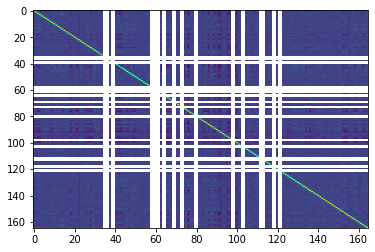

In [514]:
plt.imshow(np.quantile(shuffle_cor,0.95,axis=0),aspect="auto")

In [516]:
np.quantile(shuffle_cor,0.95,axis=0)

array([[1.        , 0.21104561, 0.22003015, ..., 0.13876074, 0.15636816,
        0.21584803],
       [0.21104561, 1.        , 0.19831304, ..., 0.19124853, 0.16011443,
        0.19511113],
       [0.22003015, 0.19831304, 1.        , ..., 0.1370297 , 0.2403044 ,
        0.25054039],
       ...,
       [0.13876074, 0.19124853, 0.1370297 , ..., 1.        , 0.15043741,
        0.208272  ],
       [0.15636816, 0.16011443, 0.2403044 , ..., 0.15043741, 1.        ,
        0.24946627],
       [0.21584803, 0.19511113, 0.25054039, ..., 0.208272  , 0.24946627,
        1.        ]])

In [506]:
threh = 0.3
rows,cols = np.where(np.bitwise_and(preA_cor > np.quantile(shuffle_cor,0.95,axis=0), preA_cor>threh))
print(rows,cols)

[126 126 126 ... 134 134 134] [ 8  9 10 ... 88 89 90]


In [486]:
for row,col in zip(rows,cols):
    
    if row>col:
        preA_cor

array([    3,     6,    10,    15,    20,    29,    40,    56,    82,
         111,   140,   177,   217,   258,   300,   343,   386,   430,
         474,   520,   569,   619,   678,   740,   803,   866,   929,
         992,  1055,  1118,  1181,  1244,  1309,  1374,  1439,  1505,
        1571,  1637,  1703,  1770,  1837,  1904,  1974,  2048,  2123,
        2199,  2275,  2351,  2427,  2503,  2579,  2655,  2731,  2808,
        2885,  2964,  3043,  3122,  3205,  3288,  3371,  3454,  3537,
        3620,  3703,  3787,  3873,  3959,  4045,  4131,  4217,  4303,
        4389,  4475,  4562,  4650,  4738,  4826,  4914,  5002,  5090,
        5178,  5266,  5355,  5444,  5533,  5622,  5711,  5800,  5889,
        5978,  6068,  6159,  6250,  6341,  6432,  6523,  6614,  6705,
        6796,  6889,  6983,  7079,  7175,  7271,  7367,  7463,  7559,
        7655,  7751,  7850,  7949,  8048,  8147,  8246,  8345,  8447,
        8549,  8653,  8757,  8861,  8969,  9079,  9202,  9325,  9450,
        9576,  9702,

In [463]:
np.bitwise_and(preA_cor > np.quantile(shuffle_cor,0.95,axis=0), preA_cor>0.3)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False]])

In [464]:
preA_cor > np.quantile(shuffle_cor,0.95,axis=0)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False]])

In [462]:
preA_cor>0.3

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ..., False, False,  True]])

In [ ]:
x = shuffle_cor[:,0,1]
np.mean(x)

In [364]:
np.apply_along_axis(np.random.shuffle,1,temp)
print(np.sum(temp,axis=1))
pd.DataFrame(temp)

[29.79387848  2.10686425 19.75453434 13.39594981 21.85442684 19.2466226
 30.07862362  0.          3.19338338  0.8829142   3.04081078  0.86026158
  1.77917575  4.36185688  6.83606597]


,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,3.633340,1.184853,16.878125,7.697606,0.000000,0.000000,0.399954,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.471560,1.635304,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,5.106729,0.001827,14.645979,0.000000,0.000000,0.000000
3,0.000000,9.457847,0.000000,0.000000,3.056971,0.000000,0.000000,0.881132,0.000000,0.000000
4,1.710394,0.000000,9.830904,0.000000,0.000000,0.000000,0.088212,0.217370,0.000000,10.007546
5,9.729718,6.039488,1.329652,0.000000,0.000000,0.000000,0.000000,1.508230,0.000000,0.639534
6,0.000000,0.000000,1.079801,26.634876,0.842489,0.000000,0.000000,0.000000,0.912287,0.609171
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,2.844505,0.000000,0.348878,0.000000,0.000000
9,0.408183,0.474731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [328]:
pd.DataFrame(temp)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.274831,0.088212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.001827,0.089394,0.408183,0.912287,0.348878,3.536285,6.039488,1.079801
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,5.106729,7.697606,0.813745,0.000000,9.457847,1.329652,0.000000,0.000000,0.000000,0.000000
8,0.842489,1.508230,3.633340,2.844505,14.645979,1.710394,1.563799,1.635304,16.878125,9.729718
9,0.217370,0.881132,0.639534,26.634876,9.830904,0.471560,1.161553,0.609171,1.709482,1.565173


In [303]:
np.array.

In [138]:
preA[35]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
from mylab.ana.miniscope.Mgraph import *

You did not provide a neuron position dictionary. The spring layout function will be used to plot the network


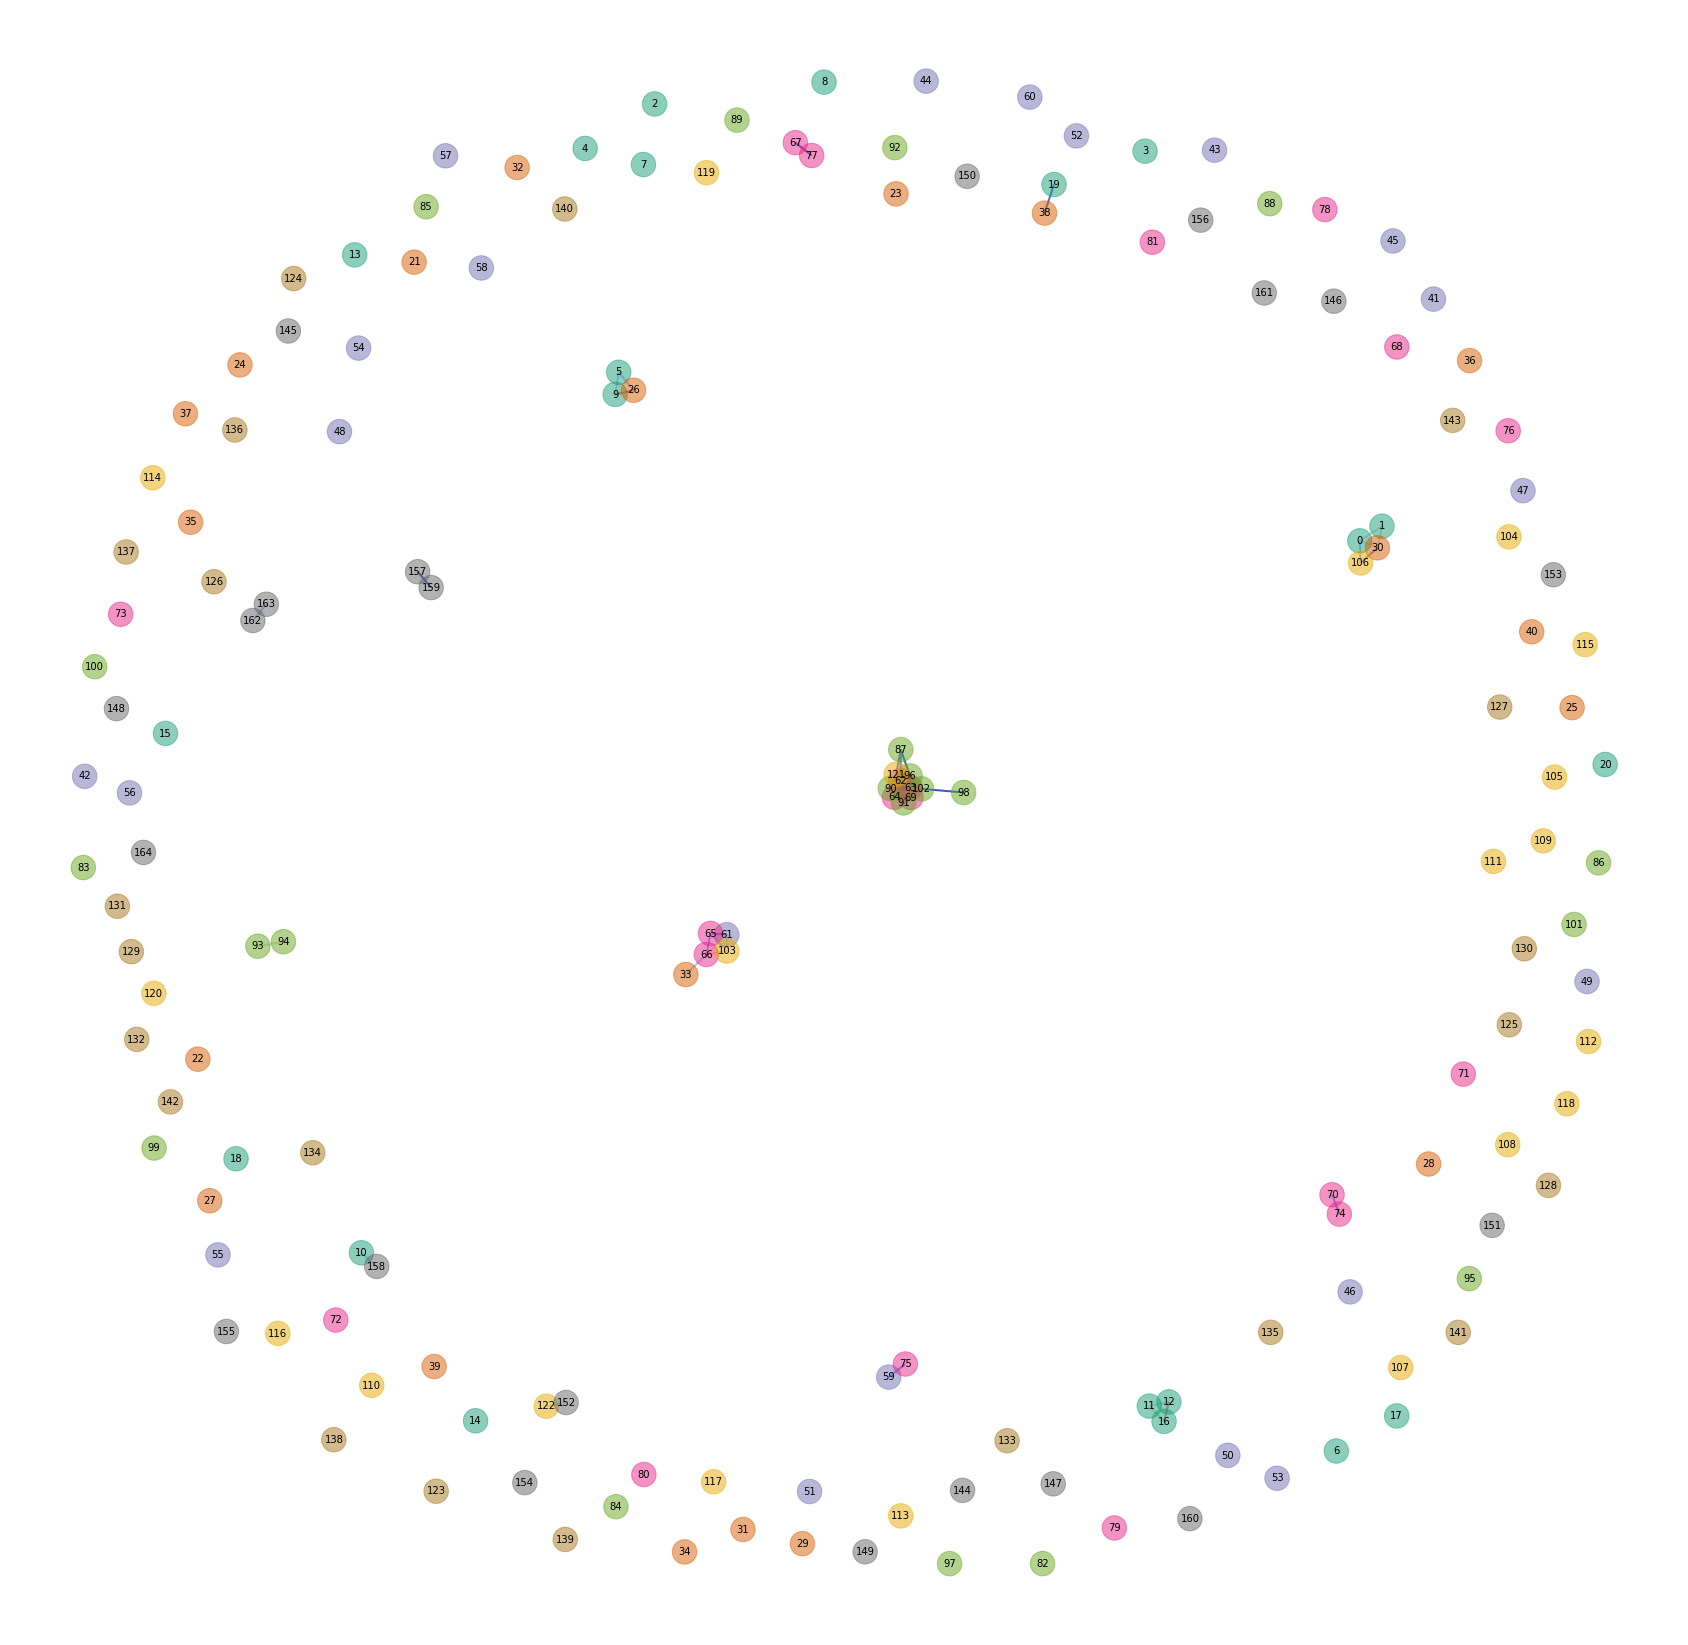

{0: array([0.6734882 , 0.38681887]),
 1: array([0.70241899, 0.4063617 ]),
 2: array([-0.24716291,  0.96954864]),
 3: array([0.39311025, 0.90657012]),
 4: array([-0.33787263,  0.91025435]),
 5: array([-0.29400359,  0.61164837]),
 6: array([ 0.64279619, -0.82719055]),
 7: array([-0.26175141,  0.88874933]),
 8: array([-0.02601842,  0.99865305]),
 9: array([-0.29865278,  0.58208506]),
 10: array([-0.62996285, -0.56278919]),
 11: array([ 0.39866333, -0.76725075]),
 12: array([ 0.42423751, -0.76165052]),
 13: array([-0.63872391,  0.76820794]),
 14: array([-0.48089764, -0.78688871]),
 15: array([-0.88574179,  0.12997988]),
 16: array([ 0.41791392, -0.78759503]),
 17: array([ 0.72165926, -0.78044072]),
 18: array([-0.79363931, -0.43746117]),
 19: array([0.27426395, 0.86209155]),
 20: array([0.99373188, 0.08851781]),
 21: array([-0.56110422,  0.7585523 ]),
 22: array([-0.84347065, -0.30455986]),
 23: array([0.06799284, 0.84962298]),
 24: array([-0.78848   ,  0.62148447]),
 25: array([0.95065369

In [140]:
g = make_graph(preA2_cor,0.7)
g.plot()

In [89]:
preA_df.columns

RangeIndex(start=0, stop=165, step=1)

In [84]:
make_graph(,0.3)

KeyError: 100

In [57]:
np.corrcoef? 

In [56]:
np.cov?